In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [2]:
df = pd.read_csv('./data.csv')
df = df[["x", "y", "row", "col", "x_rad", "y_rad", "z_rad"]]
df.head()

,x,y,row,col,x_rad,y_rad,z_rad
0,190,376,1,1,1.259682,2.241616,2.376069
1,313,566,2,2,1.548848,1.980616,2.731115
2,203,218,0,1,1.066238,2.402640,2.058912
3,101,210,0,0,1.061133,2.583722,1.777731
4,97,539,2,0,1.248911,2.163129,2.444882


In [3]:
print('x rad', df['x_rad'].min(), df['x_rad'].max())
print('y rad', df['y_rad'].min(), df['y_rad'].max())
print('z rad', df['z_rad'].min(), df['z_rad'].max())

x rad 0.9056330486683288 1.7225659931414452
y rad 1.827841069341667 2.853286586532538
z rad 1.4700118150459778 2.852511061984901


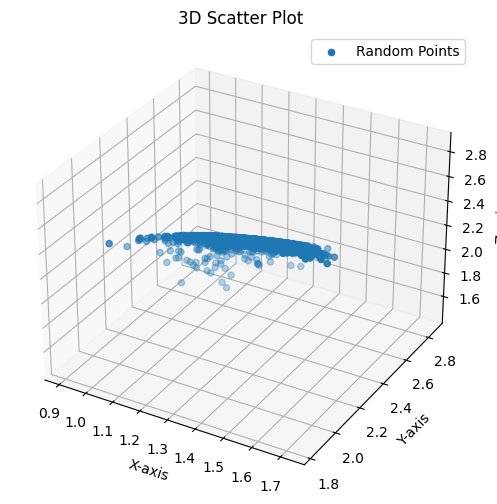

In [4]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['x_rad'], df['y_rad'], df['z_rad'], marker='o', label='Random Points')

# 축 레이블 설정
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

# 그래프 제목 설정
ax.set_title('3D Scatter Plot')

# 범례 추가
ax.legend()

# 그래프 보여주기
plt.show()

In [52]:
df = pd.read_csv('./data.csv')

grouped_df = df.groupby(['row', 'col'])
grouped_dfs = {}

for (row, col), group_df in grouped_df:
    name = f"row{row}, col{col}"
    grouped_dfs[name] = group_df[['x', 'y', 'x_rad', 'y_rad', 'z_rad', 'row', 'col', 'x_degree', 'y_degree', 'z_degree']]
    grouped_dfs[name] = grouped_dfs[name].reset_index().drop('index', axis=1)

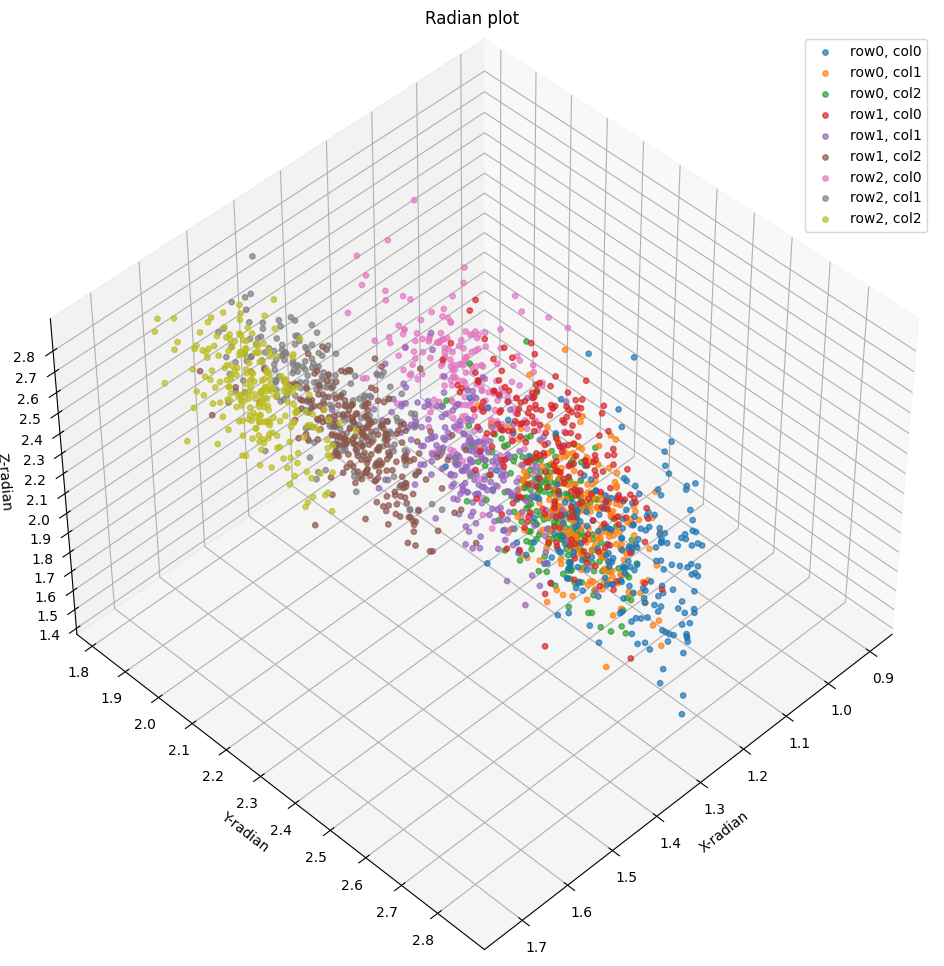

In [72]:
fig = plt.figure(figsize=(14, 12))
ax = fig.add_subplot(111, projection='3d')

ax.view_init(45, 45)

for name, group_df in grouped_dfs.items():
    ax.scatter(group_df['x_rad'], group_df['y_rad'], group_df['z_rad'],alpha=0.7,s=15, label=name)

# 축 레이블 설정
ax.set_xlabel('X-radian')
ax.set_ylabel('Y-radian')
ax.set_zlabel('Z-radian')

ax.set_xticks(np.arange(0.9, 1.8, 0.1))
ax.set_yticks(np.arange(1.8, 2.9, 0.1))
ax.set_zticks(np.arange(1.4, 2.9, 0.1))

# 그래프 제목 설정
ax.set_title('Radian plot')

# 범례 추가
ax.legend()

# 그래프 보여주기
plt.show()

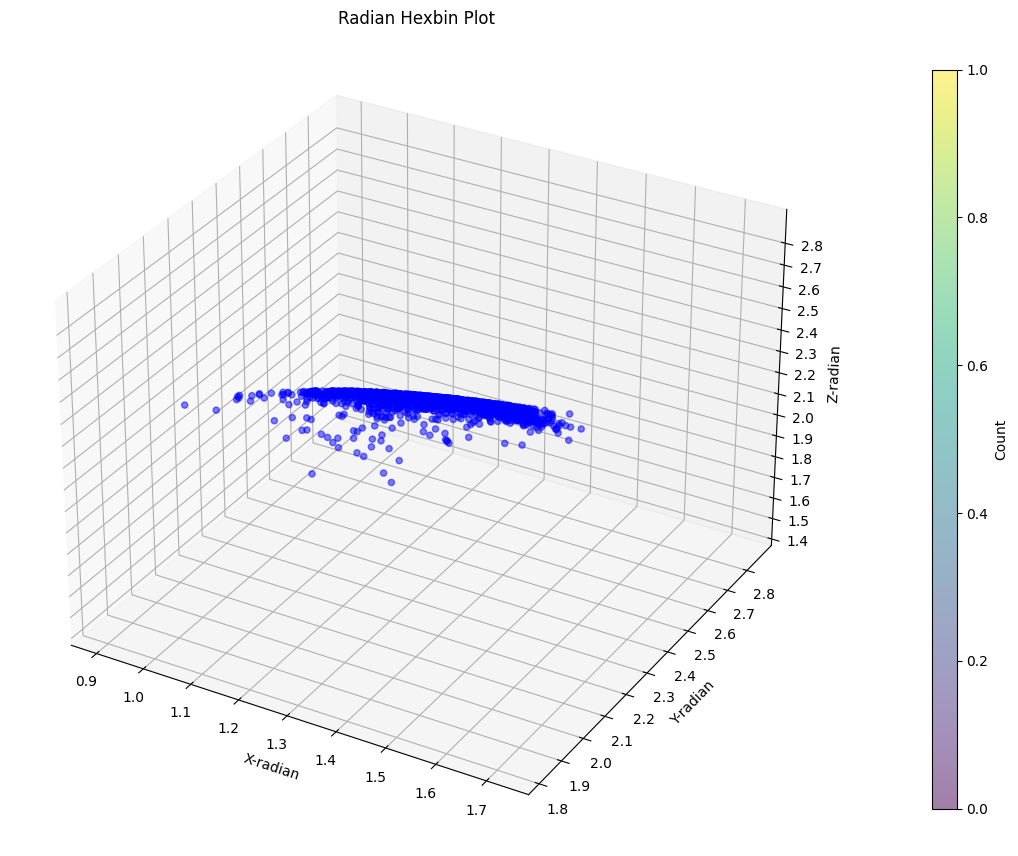

In [41]:
fig = plt.figure(figsize=(14, 12))
ax = fig.add_subplot(111, projection='3d')

# Hexbin Plot 그리기
hb = ax.scatter(df['x_rad'], df['y_rad'], df['z_rad'], c='blue', marker='o', alpha=0.5, s=20)

# 축 레이블 설정
ax.set_xlabel('X-radian')
ax.set_ylabel('Y-radian')
ax.set_zlabel('Z-radian')

# 축 눈금 설정
ax.set_xticks(np.arange(0.9, 1.8, 0.1))
ax.set_yticks(np.arange(1.8, 2.9, 0.1))
ax.set_zticks(np.arange(1.4, 2.9, 0.1))

# 그래프 제목 설정
ax.set_title('Radian Hexbin Plot')

# 컬러바 추가
cbar = plt.colorbar(hb, ax=ax, pad=0.1, aspect=30, shrink=0.8)
cbar.set_label('Count')

# 그래프 보여주기
plt.show()

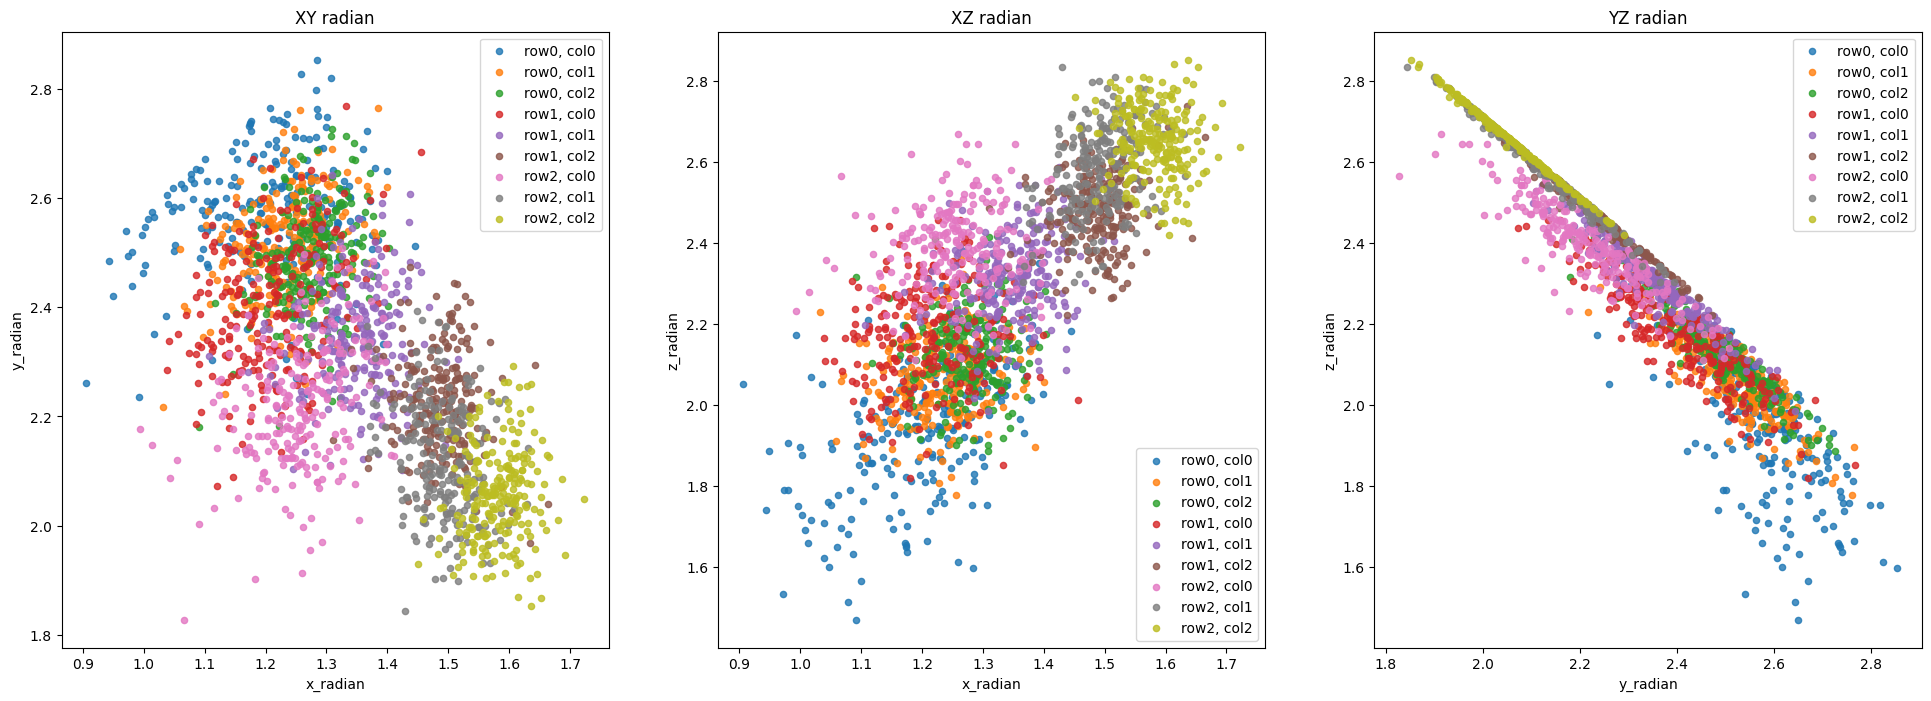

In [74]:
fig, axes = plt.subplots(1, 3, figsize=(24, 8))


for name, group_df in grouped_dfs.items():
  axes[0].scatter(group_df['x_rad'], group_df['y_rad'],s=20, alpha=0.8, label=name)
  axes[1].scatter(group_df['x_rad'], group_df['z_rad'],s=20, alpha=0.8,label=name)
  axes[2].scatter(group_df['y_rad'], group_df['z_rad'],s=20, alpha=0.8,label=name)

axes[0].set_title('XY radian')
axes[0].set_xlabel('x_radian')
axes[0].set_ylabel('y_radian')

axes[1].set_title('XZ radian')
axes[1].set_xlabel('x_radian')
axes[1].set_ylabel('z_radian')

axes[2].set_title('YZ radian')
axes[2].set_xlabel('y_radian')
axes[2].set_ylabel('z_radian')

axes[0].legend()
axes[1].legend()
axes[2].legend()